In [1]:
import pandas as pd

dataset = pd.read_csv('/home/biso/Tirocinio/tirocinio/datiLussazioniDefinitivi.csv', delimiter=';')
dataset

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,1,3,0,"56,5","31,6",1,5,4,R,2021,...,4,1,46.0,15,"17,7",NO,NaN,NaN,0,0
1,2,8,0,"9,4","40,9",1,5,4,L,2021,...,5,1,40.0,25,"27,7",NO,NaN,NaN,0,0
2,3,10,0,"15,1333333333333",35,1,5,4,R,2021,...,4,1,42.0,20,"27,7",YES,NaN,NaN,0,0
3,4,6,0,"83,4333333333333","18,7",0,6,4,L,2021,...,4,0,40.0,18,"24,2",NO,NaN,NaN,0,0
4,5,5,0,"7,53333333333333","36,4",1,4,4,L,2021,...,5,1,42.0,28,"25,9",YES,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3193,3,0,"57,4333333333333",25,1,5,2,R,2010,...,3,0,43.0,32,"27,7",NO,35.0,CRANIO-DORSALE,1,1
3193,3194,5,1,"49,2333333333333",38,1,6,2,R,2009,...,4,0,48.0,26,"25,9",NO,18.0,CRANIO-DORSALE,1,1
3194,3195,13,0,"38,0333333333333",43,1,5,2,R,2008,...,4,0,48.0,4,"11,5",NO,30.0,CRANIO-DORSALE,1,1
3195,3196,5,1,"11,5333333333333",28,1,5,2,R,2001,...,4,0,52.0,10,"31,3",NO,26.0,CRANIO-DORSALE,1,1


In [2]:
import sys

sys.path.append('/home/biso/Tirocinio/tirocinio/base_lib')

In [3]:
import functions as func
import models

In [4]:
# pulizia dataset
dataset = func.clean_dataset(dataset)

In [5]:
# eliminiamo i pochi valori nan nel dataset
dataset = dataset.dropna(subset=['HIPRL', 'BCS', 'ALO', 'STEMANTEVERSIONREAL'])

dataset = dataset.fillna(-1)

In [6]:
dataset.isna().sum()

CASE_ID                     0
BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         0
INDICATIONFORTHR            0
HIPRL                       0
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         0
CUPRETROVERSION             0
STEMANTEVERSIONREAL         0
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

In [7]:
# Definizione di X e y

# insieme di predittori
feature_cols = ['CASE_ID', 'BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 'INDICATIONFORTHR', 'HIPRL', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR', 'n_luxation', 'DIRECTION', 'first_lux_days_after_thr']
X = dataset[feature_cols]

# variabile di risposta, è una variabile binaria
y = dataset['LUX_01']

In [8]:
dataset = func.oversampling(X, y)

In [9]:
dataset

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,LUX_CR,n_luxation,DIRECTION,first_lux_days_after_thr,target
0,1,3,0,56.500000,31.600000,1,5.000000,4,1.000000,2021,...,1,46.000000,15,17.700000,0,0,-1.000000,-1.000000,-1.000000,0
1,2,8,0,9.400000,40.900000,1,5.000000,4,0.000000,2021,...,1,40.000000,25,27.700000,0,0,-1.000000,-1.000000,-1.000000,0
2,3,10,0,15.133333,35.000000,1,5.000000,4,1.000000,2021,...,1,42.000000,20,27.700000,1,0,-1.000000,-1.000000,-1.000000,0
3,4,6,0,83.433333,18.700000,0,6.000000,4,0.000000,2021,...,0,40.000000,18,24.200000,0,0,-1.000000,-1.000000,-1.000000,0
4,5,5,0,7.533333,36.400000,1,4.000000,4,0.000000,2021,...,1,42.000000,28,25.900000,1,0,-1.000000,-1.000000,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,3087,9,1,19.667583,37.866320,1,5.000000,4,1.000000,2016,...,0,48.483397,15,24.467743,0,0,1.000000,0.502372,291.511859,1
6100,3103,9,0,16.449016,47.737508,1,6.000000,4,0.327884,2004,...,1,44.639420,18,25.347594,0,0,1.327884,0.000000,55.672116,1
6101,3096,2,0,80.833862,21.314338,1,5.000000,4,0.737132,2005,...,0,36.262868,18,41.705516,0,0,1.000000,0.000000,2659.303339,1
6102,3069,12,0,94.256690,39.128324,1,5.000000,4,0.036713,2008,...,0,51.669584,25,31.300000,0,0,1.963287,0.000000,10.889861,1


In [10]:
dataset = dataset.sample(frac=1, random_state=42)

In [11]:
# Nuova definizione di X e y

feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 'INDICATIONFORTHR', 'HIPRL', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']
X = dataset[feature_cols]

y = dataset['target']

### Random forest

In [12]:
model = models.random_forest_model(X=X,
                                   y=y,
                                   n_estimators=11,
                                   max_depth=15)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       920
           1       0.96      0.94      0.95       912

    accuracy                           0.95      1832
   macro avg       0.95      0.95      0.95      1832
weighted avg       0.95      0.95      0.95      1832



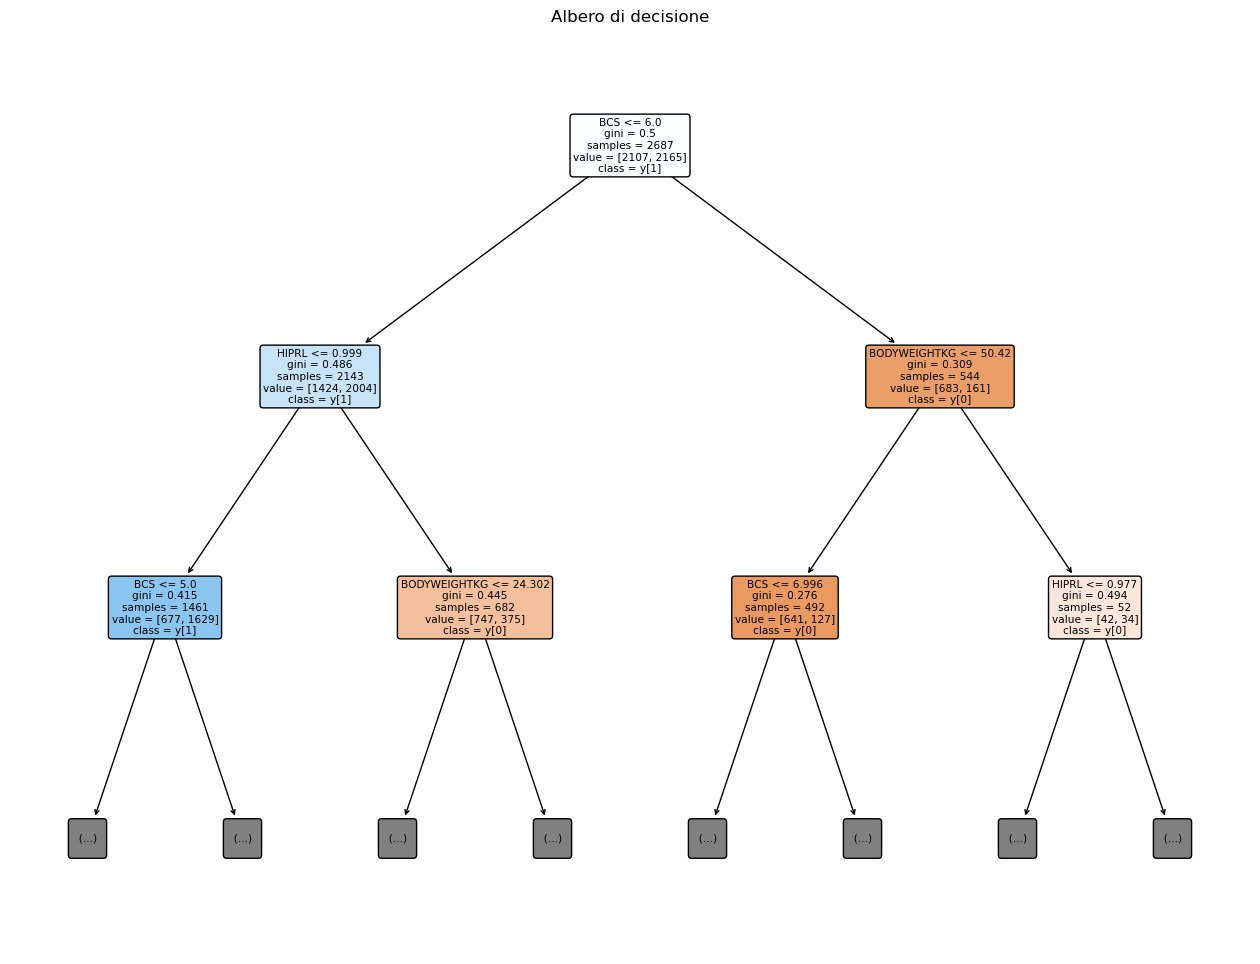

In [13]:
model.print_tree(feature_cols=feature_cols)

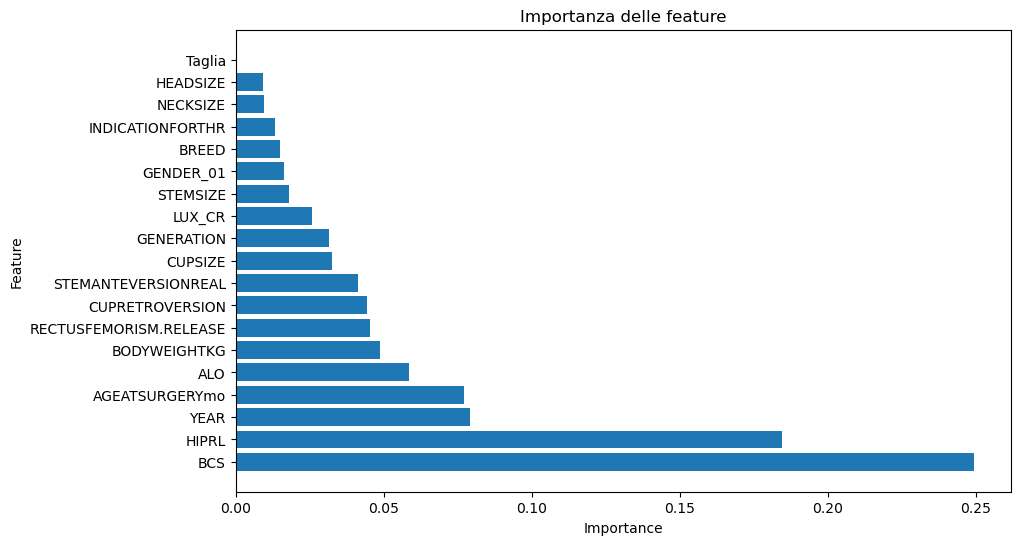

In [14]:
model.graph_feature_importance(feature_name=feature_cols)

### Random forest con grid search cv

In [15]:
param_grid = {
    'n_estimators': [11, 51, 151, 161, 171, 181, 191, 201],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
}

grid = models.random_forest_gridsearchcv_model(X=X,
                                               y=y,
                                               param_grid=param_grid,
                                               cv=10,
                                               scoring='accuracy')

Report di classificazione:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       920
           1       0.97      0.95      0.96       912

    accuracy                           0.96      1832
   macro avg       0.96      0.96      0.96      1832
weighted avg       0.96      0.96      0.96      1832

Migliori parametri: {'max_depth': 18, 'n_estimators': 191}


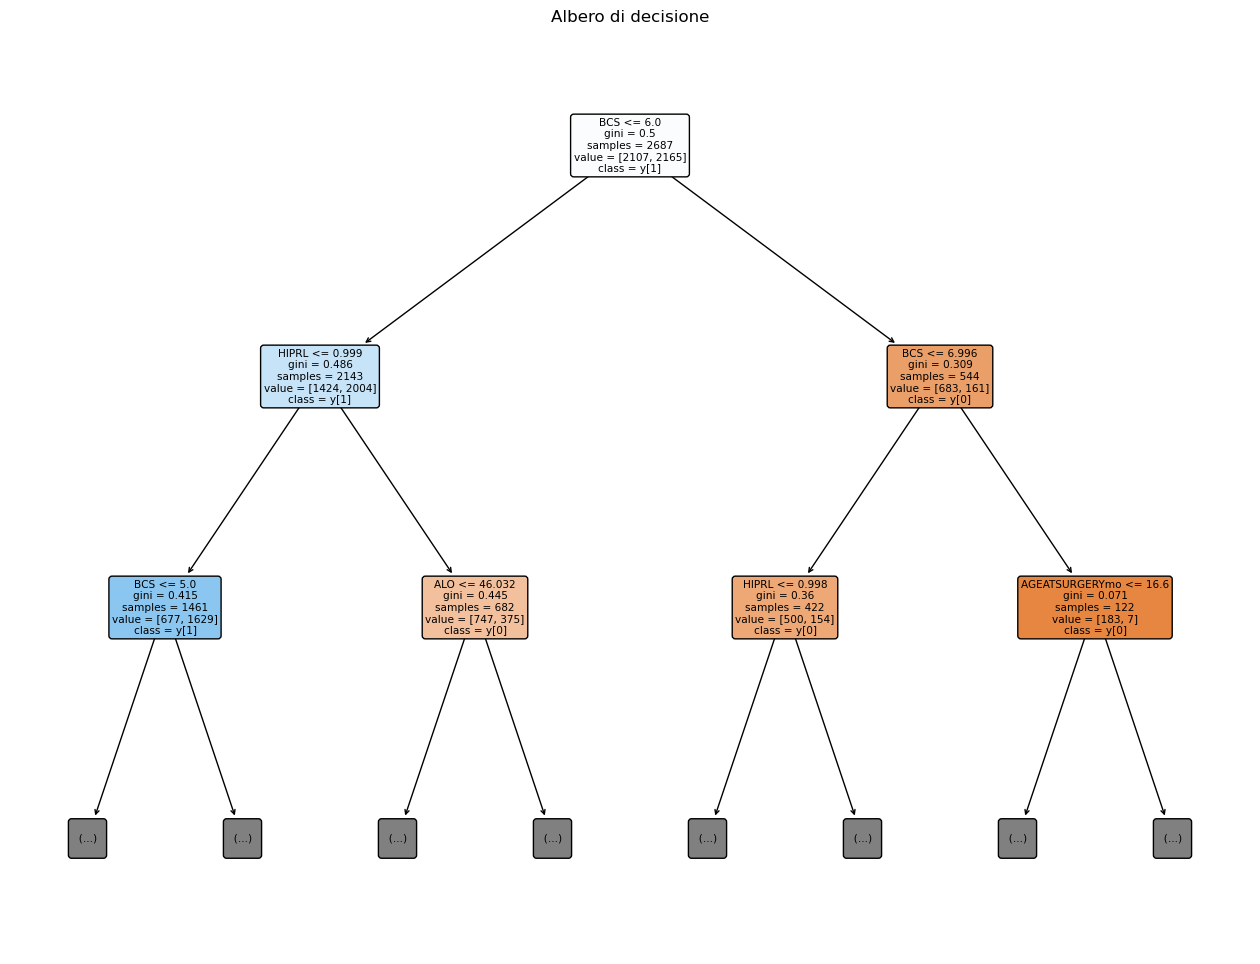

In [16]:
grid.print_tree(feature_cols=feature_cols)

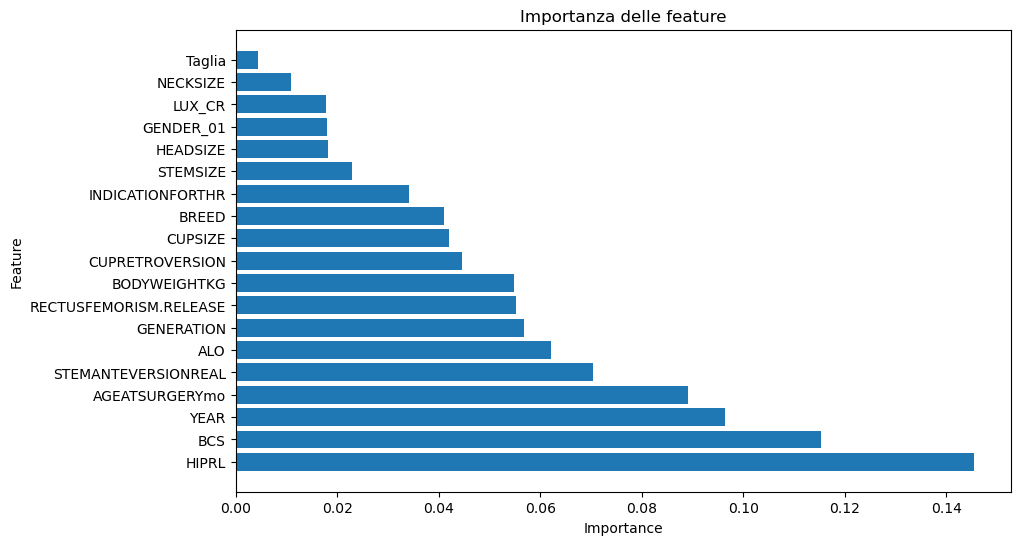

In [17]:
grid.graph_feature_importance(feature_name=feature_cols)

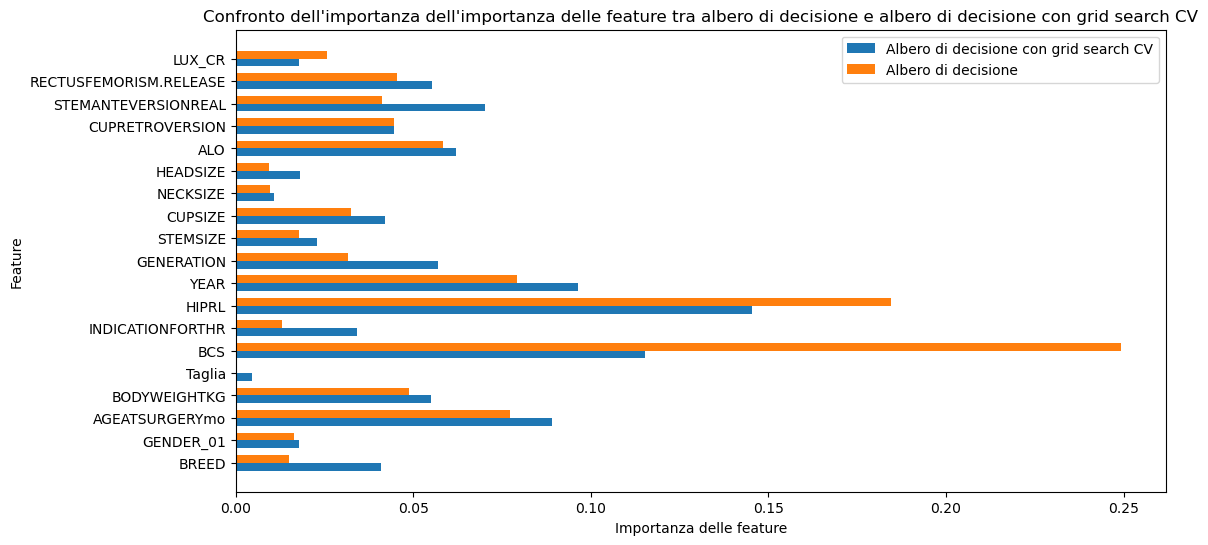

In [18]:
importance = model.feature_importance()
importance_grid = grid.feature_importance()

models.feature_importance_conf(importance, importance_grid, feature_cols=feature_cols)